In [13]:
%matplotlib widget
import numpy as np 
import ht
import matplotlib.pyplot as plt
import CoolProp as cp
from IPython.display import Latex

In [14]:
Pr_w = cp.CoolProp.PropsSI('PRANDTL', 'T',300, 'P', 101.3e3, 'Water')
mu_w = cp.CoolProp.PropsSI('V', 'T',300, 'P', 101.3e3, 'Water')
rho_w = cp.CoolProp.PropsSI('D', 'T',300, 'P', 101.3e3, 'Water')
k_w = cp.CoolProp.PropsSI('CONDUCTIVITY', 'T',300, 'P', 101.3e3, 'Water')

nu_w = mu_w/rho_w

L = 1
U = 1
D= 1

In [15]:
Re_c = D * U / nu_w
Re_p = L * U / nu_w
Nusselt_c = ht.conv_external.Nu_external_cylinder(Re_c,Pr_w)
h_c = Nusselt_c/k_w*L

display(Latex(f'$Re=${Re_c:.0f}'))

display(Latex(f'Sillage  $ h_c=${h_c:.1f}'))

Nusselt_p = ht.conv_external.Nu_external_horizontal_plate(Re_p,Pr_w)
h_p = Nusselt_p/k_w*L
display(Latex(f'Parois $h_p=${h_p:.1f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
ht.conv_external.Nu_external_cylinder(2,0.7)

0.5812501715144934

In [17]:
Re_c, Nusselt_c

(1167280.4591632166, 3349.9221684760323)

In [19]:
Pr_w

5.855926764170875

In [62]:
def Nu_plate_smooth(Re,Pr,Re_cr):
    if Re<Re_cr:
        Nu_L = 0.6774*Pr**(1/3)*Re**(1/2) / (1+(0.0468/Pr)**2/3)**(1/4)
    else:
        Nu_L = 0.6774*Pr**(1/3)*Re_cr**(1/2) / (1+(0.0468/Pr)**2/3)**(1/4)+0.037*Pr**(1/3)*(Re**0.8-Re_cr**0.8)
    return Nu_L

def Nu_plate_smooth_x(Re,Pr,Re_cr):
    if Re<Re_cr:
        Nu_x = 0.3387*Pr**(1/3)*Re**(1/2) / (1+(0.0468/Pr)**2/3)**(1/4)
    else:
        Nu_x =0.0296*Pr**(1/3)*(Re**0.8)
    return Nu_x

In [63]:
Re_cr = 5e5
Nu_plate_smooth(Re_p,Pr_w,Re_cr)

3208.744207378615

In [67]:
x = 10**np.linspace(-2,0,100)
Re_s = 10*x / nu_w
Nu_x = np.zeros_like(Re_s)
for i,Re_i in enumerate(Re_s):
    Nu_x[i] = Nu_plate_smooth_x(Re_i,Pr_w,Re_cr)

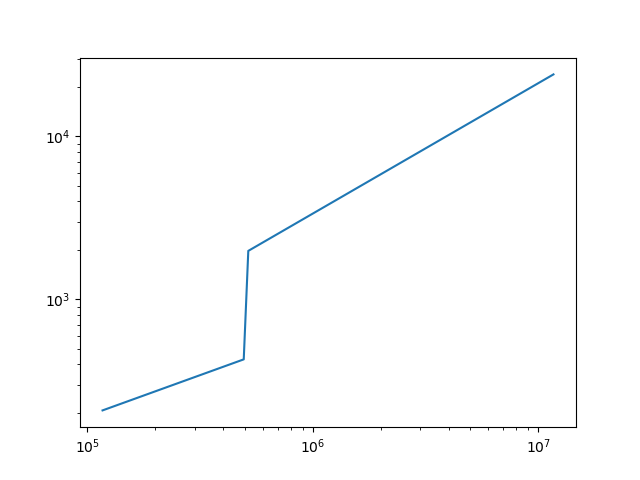

In [68]:
fig,ax = plt.subplots()
ax.loglog(Re_s,Nu_x)

In [72]:
U = 10
x = 10**np.linspace(-2,0,200)
Re_s = U*x/nu_w
Nu_s,h_s = np.tile(np.zeros_like(Re_s),[2,1])
for i,Re_i in enumerate(Re_s):
    Nu_s[i] = Nu_plate_smooth_x(Re_i,Pr_w,Re_cr)
    h_s = Nu_s*k_w/x[i]

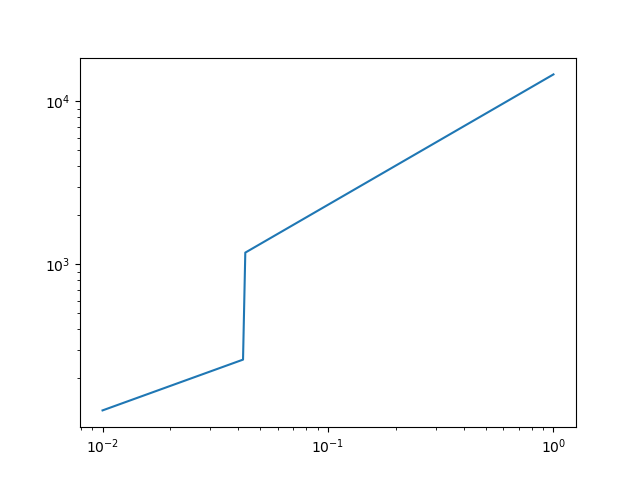

In [73]:
fig,ax = plt.subplots()
ax.loglog(x,h_s)

In [61]:
h_s.shape

(200,)